# Stock Forecasting using ARCH

https://arch.readthedocs.io/en/latest/univariate/introduction.html  
https://github.com/bashtage/arch/  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2019-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


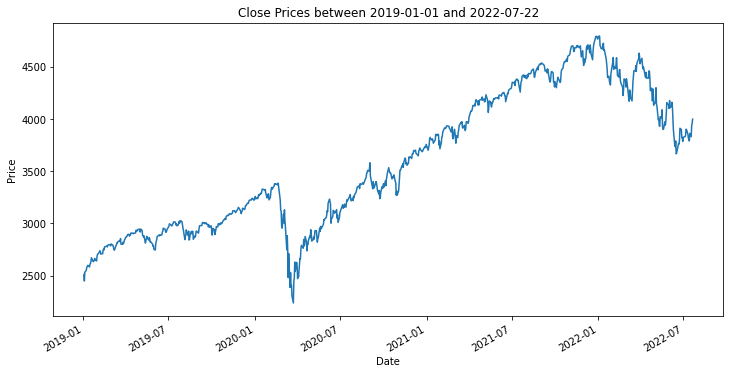

In [12]:
plt.figure(figsize = (12, 6))
plt.title(symbol + ' Close Prices between {} and {}'.format(
    start,
    end
))
df['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [5]:
returns = 100 * df['Adj Close'].pct_change().dropna()
am = arch_model(returns)

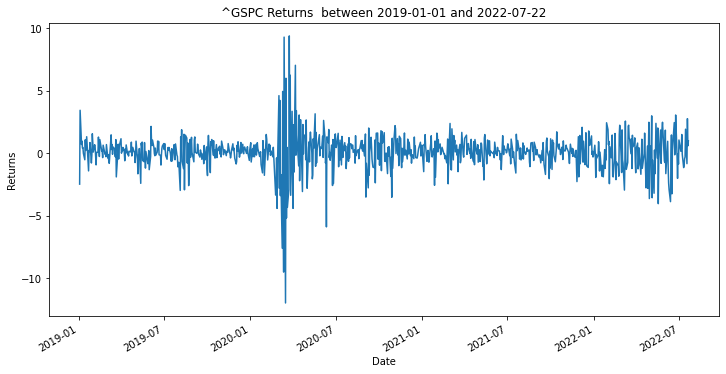

In [13]:
plt.figure(figsize = (12, 6))
plt.title(symbol + ' Returns  between {} and {}'.format(
    start,
    end
))
returns.plot()
plt.ylabel('Returns')
plt.xlabel('Date')
plt.show()

In [6]:
am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()

In [7]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4969.040208987297
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8481794321.09326
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1608.4839325244363
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1285.0689750138063
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2153.179889820231
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1284.5507807256513
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1284.4799047510055
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1284.4718944507313
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1284.4718788113355
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1284.4718767439817
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1284.4718767439028
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1284.4718767439817
            Iterations: 11
            Function evaluations: 66
            Gradient evaluat

In [8]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1284.47
Distribution:                  Normal   AIC:                           2576.94
Method:            Maximum Likelihood   BIC:                           2596.13
                                        No. Observations:                  894
Date:                Sat, Jul 23 2022   Df Residuals:                      890
Time:                        11:12:24   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1086  2.705e-02      4.016  5.918e-05 [5.562e-0